In [7]:
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.3
set_session(tf.Session(config=config))

%matplotlib inline

In [8]:
features = ['Malignancy', 'Diameter', 'Lobulation', 'Spiculation']

In [9]:
%run 'CNNBlocks.ipynb'
%run 'modelArchitectureRegression.ipynb'
%run 'batchGeneratorRegression.ipynb'

In [10]:
validInd = {}
for key in ['random', 'true']:
    validInd[key] = np.load('/home/katya/LungCancer/Katya/CNN_v3_nodule_classification/model_and_weights/valid_inds_'+key+'.npy')

In [11]:
modelPath = '/home/katya/LungCancer/Katya/CNN_v3_nodule_classification/model_and_weights/LUNA_model_v3_regression.h5'
modelPathClass = '/home/katya/LungCancer/Katya/CNN_v3_nodule_classification/model_and_weights/LUNA_model_v3_class.h5'

In [12]:
print ('Loading positive patches')
xPosTrain, ixPosTrain, xPosValid, ixPosValid = nodulePredictor('true', modelPathClass, validInd)

print ('Loading negative patches')
xNegTrain, ixNegTrain, xNegValid, ixNegValid = nodulePredictor('random', modelPathClass, validInd)

print ('Loading false positive patches')
xFP, ixFP = loadCategory('false')

Loading positive patches


/opt/anaconda/lib/python3.5/site-packages/keras/engine/topology.py:1206: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  return cls(**config)


The number of samples for true category constitutes 3570
Predicting...
2856/2856 [==============================] - 152s     

In [13]:
#Compiling model with branching on the level of Convolution block #5
model = compileModelDeepBranching((1,64,64,64), dropRate=0.3, regRate=1e-3)

/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: UserWarning: Update your `Conv3D` call to the Keras 2 API: `Conv3D(8, (3, 3, 3), kernel_regularizer=<keras.reg..., data_format="channels_first", padding="same")`
/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:12: UserWarning: Update your `MaxPooling3D` call to the Keras 2 API: `MaxPooling3D(data_format="channels_first")`
/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: UserWarning: Update your `AveragePooling3D` call to the Keras 2 API: `AveragePooling3D(data_format="channels_first")`
/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
/opt/anaconda/lib/python3.5/site-packages/keras/legacy/layers.py:456: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras

Compiling model...


/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_regularizer=<keras.reg..., name="Spiculation", activation="softplus")`
/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:55: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=[<tf.Tenso...)`


In [14]:
nbEpochs = 10

model, lossHist = trainRegressionModel(model, modelPath=modelPath, modelPathClass=modelPathClass,
                                       validInd=validInd, posFraction=0.7,
                                       batchSize=30, nbEpoch=nbEpochs, stepsPerEpoch=50)

model.save_weights('/home/katya/LungCancer/Katya/CNN_v3_nodule_classification/model_and_weights/LUNA_model_v3_weights_regression.h5')

/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:55: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<generator..., callbacks=[<keras.ca..., initial_epoch=0, validation_steps=20, steps_per_epoch=50, validation_data=<generator..., epochs=1)`


Epoch 1/1
50/50 [==============================] - 199s - loss: 1.9865 - Malignancy_loss: 0.1480 - Diameter_loss: 0.3688 - Lobulation_loss: 0.1699 - Spiculation_loss: 0.1882 - val_loss: 1.6865 - val_Malignancy_loss: 0.1105 - val_Diameter_loss: 0.1455 - val_Lobulation_loss: 0.1664 - val_Spiculation_loss: 0.1535

/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:55: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<generator..., callbacks=[<keras.ca..., initial_epoch=1, validation_steps=20, steps_per_epoch=50, validation_data=<generator..., epochs=2)`


50/50 [==============================] - 207s - loss: 1.5273 - Malignancy_loss: 0.1113 - Diameter_loss: 0.1049 - Lobulation_loss: 0.0893 - Spiculation_loss: 0.1122 - val_loss: 1.4226 - val_Malignancy_loss: 0.0784 - val_Diameter_loss: 0.0671 - val_Lobulation_loss: 0.0595 - val_Spiculation_loss: 0.1091

/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:55: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<generator..., callbacks=[<keras.ca..., initial_epoch=2, validation_steps=20, steps_per_epoch=50, validation_data=<generator..., epochs=3)`


Epoch 3/3
50/50 [==============================] - 198s - loss: 1.4775 - Malignancy_loss: 0.1149 - Diameter_loss: 0.0789 - Lobulation_loss: 0.0797 - Spiculation_loss: 0.0955 - val_loss: 1.3569 - val_Malignancy_loss: 0.0843 - val_Diameter_loss: 0.0467 - val_Lobulation_loss: 0.0462 - val_Spiculation_loss: 0.0714

/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:55: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<generator..., callbacks=[<keras.ca..., initial_epoch=3, validation_steps=20, steps_per_epoch=50, validation_data=<generator..., epochs=4)`


50/50 [==============================] - 197s - loss: 1.4606 - Malignancy_loss: 0.1053 - Diameter_loss: 0.0759 - Lobulation_loss: 0.0780 - Spiculation_loss: 0.0932 - val_loss: 1.3461 - val_Malignancy_loss: 0.0945 - val_Diameter_loss: 0.0396 - val_Lobulation_loss: 0.0455 - val_Spiculation_loss: 0.0583

/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:55: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<generator..., callbacks=[<keras.ca..., initial_epoch=4, validation_steps=20, steps_per_epoch=50, validation_data=<generator..., epochs=5)`


50/50 [==============================] - 197s - loss: 1.4653 - Malignancy_loss: 0.1197 - Diameter_loss: 0.0707 - Lobulation_loss: 0.0780 - Spiculation_loss: 0.0890 - val_loss: 1.3622 - val_Malignancy_loss: 0.1115 - val_Diameter_loss: 0.0356 - val_Lobulation_loss: 0.0535 - val_Spiculation_loss: 0.0536

/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:55: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<generator..., callbacks=[<keras.ca..., initial_epoch=5, validation_steps=20, steps_per_epoch=50, validation_data=<generator..., epochs=6)`


50/50 [==============================] - 197s - loss: 1.4590 - Malignancy_loss: 0.1114 - Diameter_loss: 0.0755 - Lobulation_loss: 0.0736 - Spiculation_loss: 0.0908 - val_loss: 1.3524 - val_Malignancy_loss: 0.1237 - val_Diameter_loss: 0.0301 - val_Lobulation_loss: 0.0443 - val_Spiculation_loss: 0.0466

/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:55: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<generator..., callbacks=[<keras.ca..., initial_epoch=6, validation_steps=20, steps_per_epoch=50, validation_data=<generator..., epochs=7)`


50/50 [==============================] - 197s - loss: 1.4492 - Malignancy_loss: 0.1043 - Diameter_loss: 0.0719 - Lobulation_loss: 0.0743 - Spiculation_loss: 0.0910 - val_loss: 1.3881 - val_Malignancy_loss: 0.1452 - val_Diameter_loss: 0.0340 - val_Lobulation_loss: 0.0530 - val_Spiculation_loss: 0.0482

/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:55: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<generator..., callbacks=[<keras.ca..., initial_epoch=7, validation_steps=20, steps_per_epoch=50, validation_data=<generator..., epochs=8)`


50/50 [==============================] - 199s - loss: 1.4421 - Malignancy_loss: 0.1081 - Diameter_loss: 0.0672 - Lobulation_loss: 0.0758 - Spiculation_loss: 0.0833 - val_loss: 1.3651 - val_Malignancy_loss: 0.1329 - val_Diameter_loss: 0.0310 - val_Lobulation_loss: 0.0489 - val_Spiculation_loss: 0.0447

/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:55: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<generator..., callbacks=[<keras.ca..., initial_epoch=8, validation_steps=20, steps_per_epoch=50, validation_data=<generator..., epochs=9)`


50/50 [==============================] - 404s - loss: 1.4416 - Malignancy_loss: 0.1130 - Diameter_loss: 0.0674 - Lobulation_loss: 0.0700 - Spiculation_loss: 0.0837 - val_loss: 1.3663 - val_Malignancy_loss: 0.1282 - val_Diameter_loss: 0.0300 - val_Lobulation_loss: 0.0510 - val_Spiculation_loss: 0.0497

/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:55: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<generator..., callbacks=[<keras.ca..., initial_epoch=9, validation_steps=20, steps_per_epoch=50, validation_data=<generator..., epochs=10)`


50/50 [==============================] - 221s - loss: 1.4443 - Malignancy_loss: 0.1100 - Diameter_loss: 0.0684 - Lobulation_loss: 0.0693 - Spiculation_loss: 0.0893 - val_loss: 1.3765 - val_Malignancy_loss: 0.1463 - val_Diameter_loss: 0.0284 - val_Lobulation_loss: 0.0504 - val_Spiculation_loss: 0.0442

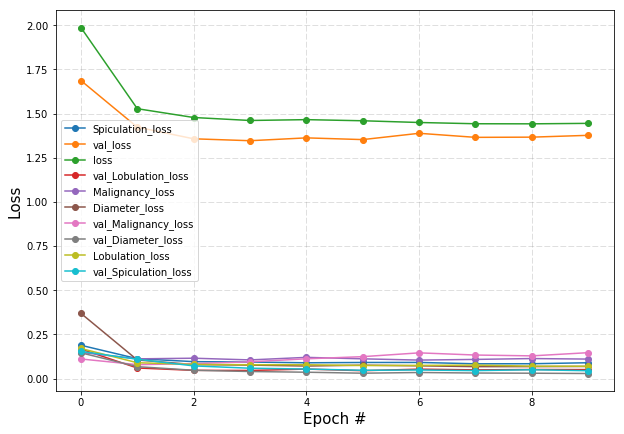

In [18]:
plt.figure(figsize=[10,7])
plt.grid(True, ls='--', lw=0.5, alpha=0.5, dash_capstyle = 'round', c='gray')
plt.xlabel('Epoch #', fontsize=15)
plt.ylabel('Loss', fontsize=15)

labels=list(lossHist.keys())

for i,key in enumerate(lossHist):
    plt.plot([x for x in range(nbEpochs)], lossHist[key], 'o-', label=labels[i])
    plt.legend()
    
plt.savefig('/home/katya/LungCancer/Katya/CNN_v3_nodule_classification/figures/' + str(version) + '.png')

In [15]:
version = 2.3

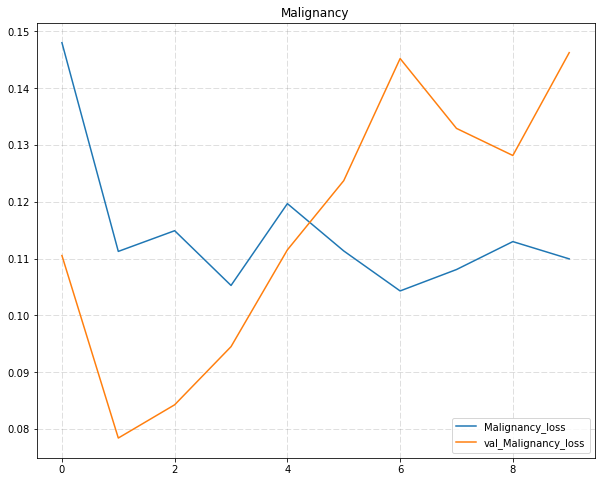

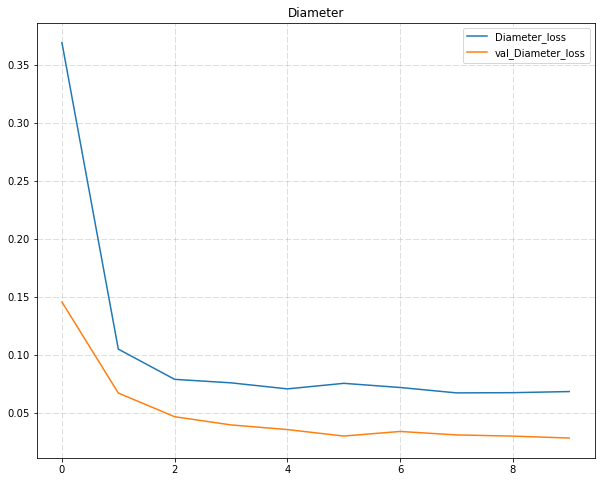

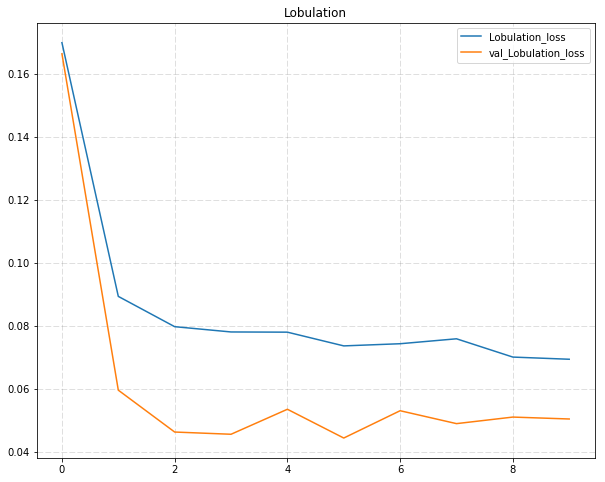

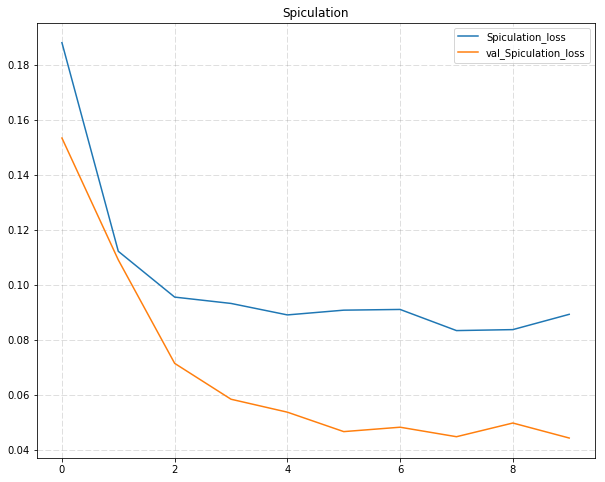

In [17]:
for feature in features:
    plt.figure(figsize=[10,8])
    plt.grid(True, ls='--', lw=0.5, alpha=0.5, dash_capstyle = 'round', c='gray')

    plt.plot([x for x in range(nbEpochs)], lossHist[feature+'_loss'], label=feature+'_loss')
    plt.plot([x for x in range(nbEpochs)], lossHist['val_'+feature+'_loss'], label='val_'+feature+'_loss')
    plt.title(feature)
    plt.legend()
    plt.savefig('/home/katya/LungCancer/Katya/CNN_v3_nodule_classification/figures/'+str(version)+'.'+feature+'.png')